In [1]:
import matplotlib.pyplot as plt
import mpl_lego as mplego
import numpy as np
import pandas as pd

from functools import partial
from mpl_lego.labels import bold_text
from scipy.stats import bootstrap
from pyprojroot import here
 
%matplotlib inline

In [2]:
mplego.style.use_latex_style()

In [11]:
df = pd.read_csv(here('data/aita_final_v12.csv'))

/var/folders/6h/ms_dpkl536d1w6qqd_wnckrw0000gn/T/ipykernel_7917/578883615.py:1: DtypeWarning: Columns (29,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(here('data/aita_final_v12.csv'))


In [18]:
(df['fairness_prob'] > 0.5).mean()

0.4256419730278958

In [4]:
verdict_cols = [
    'reddit_label',
    'gpt3.5_label_1',
    'gpt4_label',
    'claude_label',
    'bison_label_1',
    'gemma_label_1',
    'mistral_label_1',
    'llama_label_1']
n_verdicts = len(verdict_cols)
labels = ['NTA', 'YTA', 'NAH', 'ESH', 'INF']
n_labels = len(labels)
plot_labels = ['Redditor',
               'GPT 3.5',
               'GPT 4',
               'Claude Sonnet',
               'Bison',
               'Gemma 7B',
               'Mistral 7B',
               'Llama 2 7B']

In [12]:
df['harm_label'] = df['harm_prob'] > 0.5
df['honesty_label'] = df['honesty_prob'] > 0.5
df['relational_obligation_label'] = df['relational_obligation_prob'] > 0.5
df['feelings_label'] = df['feelings_prob'] > 0.5
df['fairness_label'] = df['fairness_prob'] > 0.5
df['social_norms_label'] = df['social_norms_prob'] > 0.5

In [13]:
# Calculate bootstrap estimates
def label_difference(records, scenario, model_name, label):
    scenarios = records[scenario]
    verdicts = records[model_name]
    diff = (verdicts[scenarios == True] == label).mean() - (verdicts[scenarios == False] == label).mean()
    return diff

In [104]:
scenario = 'harm_label'
bounds = [[bootstrap((df[[scenario, verdict]].to_records(index=False),),
          partial(label_difference, scenario=scenario, model_name=verdict, label=label))
          for label in labels]
          for verdict in verdict_cols]

/opt/homebrew/Caskroom/miniforge/base/envs/nlp/lib/python3.9/site-packages/scipy/stats/_resampling.py:147: RuntimeWarning: invalid value encountered in scalar divide
  a_hat = 1/6 * sum(nums) / sum(dens)**(3/2)
/opt/homebrew/Caskroom/miniforge/base/envs/nlp/lib/python3.9/site-packages/scipy/stats/_resampling.py:100: DegenerateDataWarning: The BCa confidence interval cannot be calculated. This problem is known to occur when the distribution is degenerate or the statistic is np.min.
  warnings.warn(DegenerateDataWarning(msg))


Text(-0.07, -0.15, "\\textbf{Lower Prevalence}\n\\textbf{for ``Harms'' Scenarios}")

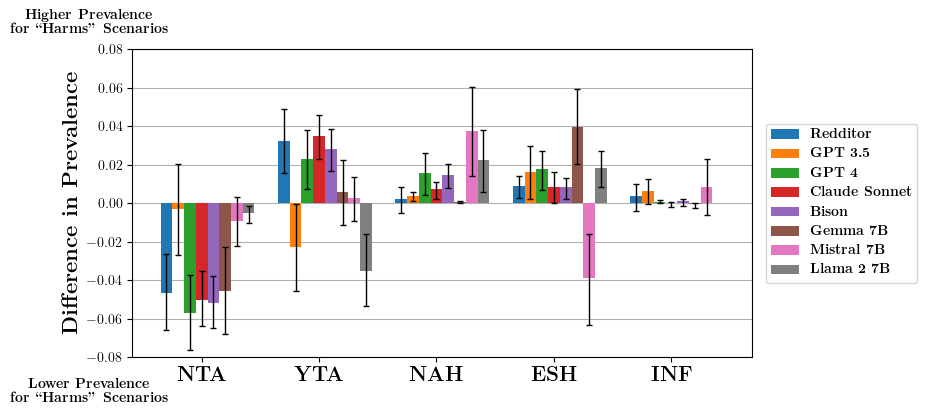

In [125]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

width = 0.1

for idx, verdict in enumerate(verdict_cols):
    proportions1 = df[df['harm_label']][verdict].value_counts(normalize=True)
    proportions2 = df[~df['harm_label']][verdict].value_counts(normalize=True)
    
    for label in labels:
        if label not in proportions1:
            proportions1[label] = 0
        if label not in proportions2:
            proportions2[label] = 0

    diff = proportions1 - proportions2
    diffs = [diff[label] for label in labels]

    ax.bar(
        x=np.arange(n_labels) + idx * width,
        height=diffs,
        width=width,
        color=f'C{idx}',
        yerr=[[diffs[jj] - bound.confidence_interval.low for jj, bound in enumerate(bounds[idx])],
              [bound.confidence_interval.high - diffs[jj] for jj, bound in enumerate(bounds[idx])]],
        capsize=2,
        error_kw={'linewidth': 1})    

ax.set_xticks(np.arange(5) + 3 * width)
ax.set_xticklabels(bold_text(labels), fontsize=15)

for idx, label in enumerate(plot_labels):
    ax.bar(x=0.5, height=0, color=f'C{idx}', label=bold_text(label))

ax.legend(loc='center left', bbox_to_anchor=(1.01, 0.5))
    
ax.set_ylim([-0.08, 0.08])
ax.grid(axis='y')
ax.set_axisbelow(True)

ax.set_ylabel(bold_text('Difference in Prevalence'), fontsize=16)

ax.text(x=-0.07, y=1.05, s=bold_text("Higher Prevalence\nfor ``Harms'' Scenarios"), transform=ax.transAxes, ha='center')
ax.text(x=-0.07, y=-0.15, s=bold_text("Lower Prevalence\nfor ``Harms'' Scenarios"), transform=ax.transAxes, ha='center')

In [126]:
scenario = 'honesty_label'
bounds = [[bootstrap((df[[scenario, verdict]].to_records(index=False),),
          partial(label_difference, scenario=scenario, model_name=verdict, label=label))
          for label in labels]
          for verdict in verdict_cols]

/opt/homebrew/Caskroom/miniforge/base/envs/nlp/lib/python3.9/site-packages/scipy/stats/_resampling.py:147: RuntimeWarning: invalid value encountered in scalar divide
  a_hat = 1/6 * sum(nums) / sum(dens)**(3/2)
/opt/homebrew/Caskroom/miniforge/base/envs/nlp/lib/python3.9/site-packages/scipy/stats/_resampling.py:100: DegenerateDataWarning: The BCa confidence interval cannot be calculated. This problem is known to occur when the distribution is degenerate or the statistic is np.min.
  warnings.warn(DegenerateDataWarning(msg))


Text(-0.07, -0.15, "\\textbf{Lower Prevalence}\n\\textbf{for ``Honesty'' Scenarios}")

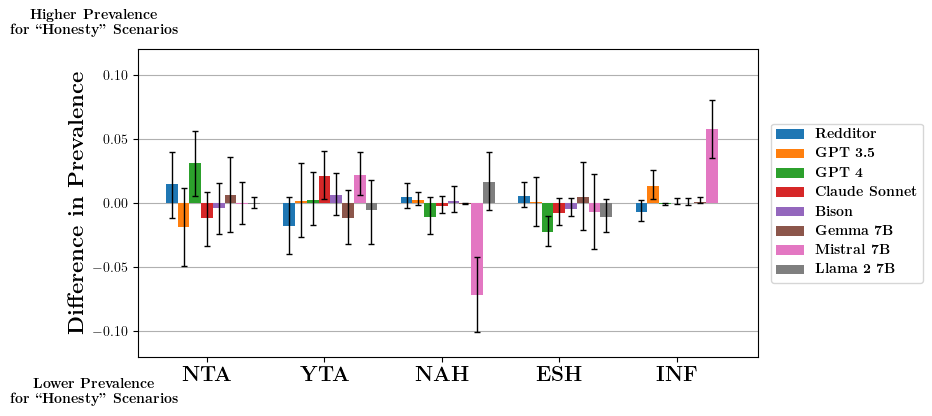

In [139]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

width = 0.1

for idx, verdict in enumerate(verdict_cols):
    proportions1 = df[df['honesty_label']][verdict].value_counts(normalize=True)
    proportions2 = df[~df['honesty_label']][verdict].value_counts(normalize=True)
    
    for label in labels:
        if label not in proportions1:
            proportions1[label] = 0
        if label not in proportions2:
            proportions2[label] = 0

    diff = proportions1 - proportions2
    diffs = [diff[label] for label in labels]

    ax.bar(
        x=np.arange(n_labels) + idx * width,
        height=[diff[label] for label in labels],
        width=width,
        color=f'C{idx}',
        yerr=[[diffs[jj] - bound.confidence_interval.low for jj, bound in enumerate(bounds[idx])],
              [bound.confidence_interval.high - diffs[jj] for jj, bound in enumerate(bounds[idx])]],
        capsize=2,
        error_kw={'linewidth': 1})   

ax.set_xticks(np.arange(5) + 3 * width)
ax.set_xticklabels(bold_text(labels), fontsize=15)

for idx, label in enumerate(plot_labels):
    ax.bar(x=0.5, height=0, color=f'C{idx}', label=bold_text(label))

ax.legend(loc='center left', bbox_to_anchor=(1.01, 0.5))
    
ax.set_ylim([-0.12, 0.12])
ax.grid(axis='y')
ax.set_axisbelow(True)

ax.set_ylabel(bold_text('Difference in Prevalence'), fontsize=16)

ax.text(x=-0.07, y=1.05, s=bold_text("Higher Prevalence\nfor ``Honesty'' Scenarios"), transform=ax.transAxes, ha='center')
ax.text(x=-0.07, y=-0.15, s=bold_text("Lower Prevalence\nfor ``Honesty'' Scenarios"), transform=ax.transAxes, ha='center')

In [147]:
scenario = 'relational_obligation_label'
bounds = [[bootstrap((df[[scenario, verdict]].to_records(index=False),),
          partial(label_difference, scenario=scenario, model_name=verdict, label=label))
          for label in labels]
          for verdict in verdict_cols]

/opt/homebrew/Caskroom/miniforge/base/envs/nlp/lib/python3.9/site-packages/scipy/stats/_resampling.py:147: RuntimeWarning: invalid value encountered in scalar divide
  a_hat = 1/6 * sum(nums) / sum(dens)**(3/2)
/opt/homebrew/Caskroom/miniforge/base/envs/nlp/lib/python3.9/site-packages/scipy/stats/_resampling.py:100: DegenerateDataWarning: The BCa confidence interval cannot be calculated. This problem is known to occur when the distribution is degenerate or the statistic is np.min.
  warnings.warn(DegenerateDataWarning(msg))


Text(-0.07, -0.15, "\\textbf{Lower Prevalence}\n\\textbf{for ``Relational Obligation'' Scenarios}")

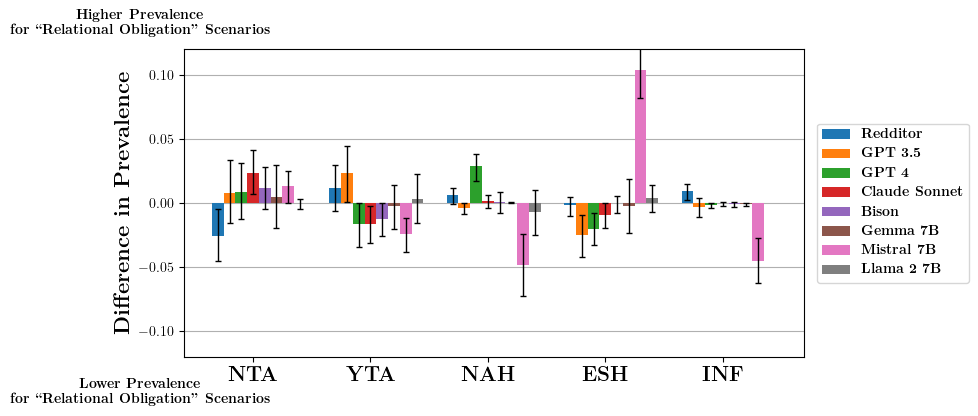

In [148]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

width = 0.1

for idx, verdict in enumerate(verdict_cols):
    proportions1 = df[df[scenario]][verdict].value_counts(normalize=True)
    proportions2 = df[~df[scenario]][verdict].value_counts(normalize=True)
    
    for label in labels:
        if label not in proportions1:
            proportions1[label] = 0
        if label not in proportions2:
            proportions2[label] = 0

    diff = proportions1 - proportions2
    diffs = [diff[label] for label in labels]

    ax.bar(
        x=np.arange(n_labels) + idx * width,
        height=[diff[label] for label in labels],
        width=width,
        color=f'C{idx}',
        yerr=[[diffs[jj] - bound.confidence_interval.low for jj, bound in enumerate(bounds[idx])],
              [bound.confidence_interval.high - diffs[jj] for jj, bound in enumerate(bounds[idx])]],
        capsize=2,
        error_kw={'linewidth': 1})   

ax.set_xticks(np.arange(5) + 3 * width)
ax.set_xticklabels(bold_text(labels), fontsize=15)

for idx, label in enumerate(plot_labels):
    ax.bar(x=0.5, height=0, color=f'C{idx}', label=bold_text(label))

ax.legend(loc='center left', bbox_to_anchor=(1.01, 0.5))
    
ax.set_ylim([-0.12, 0.12])
ax.grid(axis='y')
ax.set_axisbelow(True)

ax.set_ylabel(bold_text('Difference in Prevalence'), fontsize=16)

ax.text(x=-0.07, y=1.05, s=bold_text("Higher Prevalence\nfor ``Relational Obligation'' Scenarios"), transform=ax.transAxes, ha='center')
ax.text(x=-0.07, y=-0.15, s=bold_text("Lower Prevalence\nfor ``Relational Obligation'' Scenarios"), transform=ax.transAxes, ha='center')

In [9]:
scenario = 'fairness_label'
bounds = [[bootstrap((df[[scenario, verdict]].to_records(index=False),),
          partial(label_difference, scenario=scenario, model_name=verdict, label=label))
          for label in labels]
          for verdict in verdict_cols]

/opt/homebrew/Caskroom/miniforge/base/envs/nlp/lib/python3.9/site-packages/scipy/stats/_resampling.py:147: RuntimeWarning: invalid value encountered in scalar divide
  a_hat = 1/6 * sum(nums) / sum(dens)**(3/2)
/opt/homebrew/Caskroom/miniforge/base/envs/nlp/lib/python3.9/site-packages/scipy/stats/_resampling.py:100: DegenerateDataWarning: The BCa confidence interval cannot be calculated. This problem is known to occur when the distribution is degenerate or the statistic is np.min.
  warnings.warn(DegenerateDataWarning(msg))


Text(-0.07, -0.15, "\\textbf{Lower Prevalence}\n\\textbf{for ``Fairness'' Scenarios}")

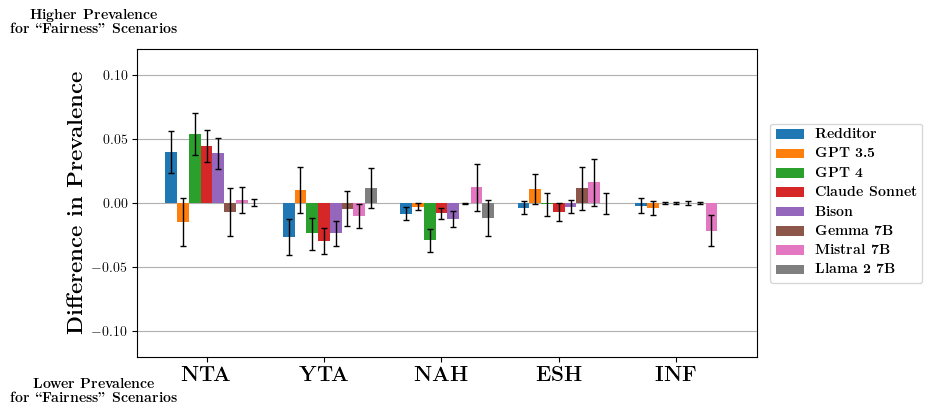

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

width = 0.1

for idx, verdict in enumerate(verdict_cols):
    proportions1 = df[df[scenario]][verdict].value_counts(normalize=True)
    proportions2 = df[~df[scenario]][verdict].value_counts(normalize=True)
    
    for label in labels:
        if label not in proportions1:
            proportions1[label] = 0
        if label not in proportions2:
            proportions2[label] = 0

    diff = proportions1 - proportions2
    diffs = [diff[label] for label in labels]

    ax.bar(
        x=np.arange(n_labels) + idx * width,
        height=[diff[label] for label in labels],
        width=width,
        color=f'C{idx}',
        yerr=[[diffs[jj] - bound.confidence_interval.low for jj, bound in enumerate(bounds[idx])],
              [bound.confidence_interval.high - diffs[jj] for jj, bound in enumerate(bounds[idx])]],
        capsize=2,
        error_kw={'linewidth': 1})   

ax.set_xticks(np.arange(5) + 3 * width)
ax.set_xticklabels(bold_text(labels), fontsize=15)

for idx, label in enumerate(plot_labels):
    ax.bar(x=0.5, height=0, color=f'C{idx}', label=bold_text(label))

ax.legend(loc='center left', bbox_to_anchor=(1.01, 0.5))
    
ax.set_ylim([-0.12, 0.12])
ax.grid(axis='y')
ax.set_axisbelow(True)

ax.set_ylabel(bold_text('Difference in Prevalence'), fontsize=16)

ax.text(x=-0.07, y=1.05, s=bold_text("Higher Prevalence\nfor ``Fairness'' Scenarios"), transform=ax.transAxes, ha='center')
ax.text(x=-0.07, y=-0.15, s=bold_text("Lower Prevalence\nfor ``Fairness'' Scenarios"), transform=ax.transAxes, ha='center')

In [8]:
scenario = 'feelings_label'
bounds = [[bootstrap((df[[scenario, verdict]].to_records(index=False),),
          partial(label_difference, scenario=scenario, model_name=verdict, label=label))
          for label in labels]
          for verdict in verdict_cols]

/opt/homebrew/Caskroom/miniforge/base/envs/nlp/lib/python3.9/site-packages/scipy/stats/_resampling.py:147: RuntimeWarning: invalid value encountered in scalar divide
  a_hat = 1/6 * sum(nums) / sum(dens)**(3/2)
/opt/homebrew/Caskroom/miniforge/base/envs/nlp/lib/python3.9/site-packages/scipy/stats/_resampling.py:100: DegenerateDataWarning: The BCa confidence interval cannot be calculated. This problem is known to occur when the distribution is degenerate or the statistic is np.min.
  warnings.warn(DegenerateDataWarning(msg))


Text(-0.07, -0.15, "\\textbf{Lower Prevalence}\n\\textbf{for ``Feelings'' Scenarios}")

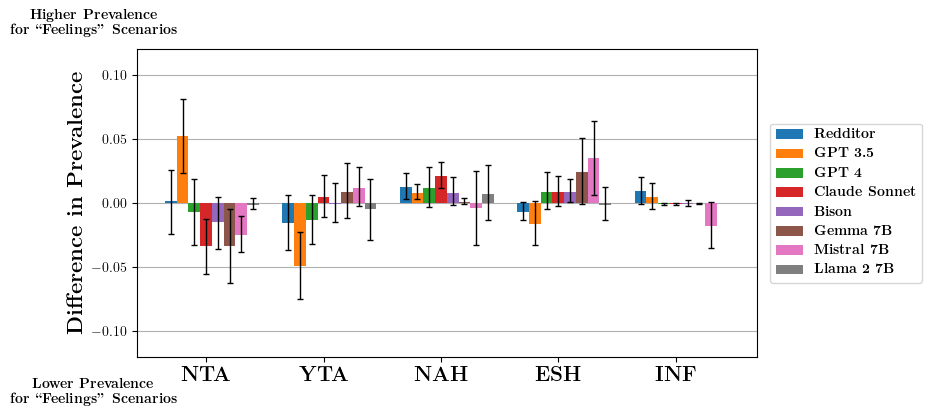

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

width = 0.1

for idx, verdict in enumerate(verdict_cols):
    proportions1 = df[df[scenario]][verdict].value_counts(normalize=True)
    proportions2 = df[~df[scenario]][verdict].value_counts(normalize=True)
    
    for label in labels:
        if label not in proportions1:
            proportions1[label] = 0
        if label not in proportions2:
            proportions2[label] = 0

    diff = proportions1 - proportions2
    diffs = [diff[label] for label in labels]

    ax.bar(
        x=np.arange(n_labels) + idx * width,
        height=[diff[label] for label in labels],
        width=width,
        color=f'C{idx}',
        yerr=[[diffs[jj] - bound.confidence_interval.low for jj, bound in enumerate(bounds[idx])],
              [bound.confidence_interval.high - diffs[jj] for jj, bound in enumerate(bounds[idx])]],
        capsize=2,
        error_kw={'linewidth': 1})   

ax.set_xticks(np.arange(5) + 3 * width)
ax.set_xticklabels(bold_text(labels), fontsize=15)

for idx, label in enumerate(plot_labels):
    ax.bar(x=0.5, height=0, color=f'C{idx}', label=bold_text(label))

ax.legend(loc='center left', bbox_to_anchor=(1.01, 0.5))
    
ax.set_ylim([-0.12, 0.12])
ax.grid(axis='y')
ax.set_axisbelow(True)

ax.set_ylabel(bold_text('Difference in Prevalence'), fontsize=16)

ax.text(x=-0.07, y=1.05, s=bold_text("Higher Prevalence\nfor ``Feelings'' Scenarios"), transform=ax.transAxes, ha='center')
ax.text(x=-0.07, y=-0.15, s=bold_text("Lower Prevalence\nfor ``Feelings'' Scenarios"), transform=ax.transAxes, ha='center')

In [20]:
sorted_feelings = df.sort_values('feelings_prob', ascending=False)
subset = sorted_feelings[sorted_feelings['gpt3.5_label_1'] == 'NTA']

In [22]:
subset[verdict_cols].head(20)

,reddit_label,gpt3.5_label_1,gpt4_label,claude_label,bison_label_1,gemma_label_1,mistral_label_1,llama_label_1
5572,INF,NTA,NTA,NTA,NTA,NTA,ESH,YTA
10787,YTA,NTA,YTA,NAH,NTA,NTA,NAH,YTA
4586,NTA,NTA,NTA,NTA,NTA,ESH,NTA,YTA
5320,NTA,NTA,NTA,NTA,NTA,NTA,NAH,NAH
4978,NTA,NTA,NTA,NTA,NTA,ESH,ESH,YTA
94,NTA,NTA,NTA,NTA,NTA,NTA,ESH,YTA
4185,NTA,NTA,NTA,NTA,NTA,NTA,ESH,YTA
7174,NTA,NTA,NTA,NTA,NTA,YTA,NAH,ESH
3396,YTA,NTA,YTA,NAH,NTA,NTA,ESH,YTA
7298,NTA,NTA,NTA,NTA,NTA,NTA,NAH,YTA


In [29]:
subset.iloc[1][verdict_cols]

reddit_label       YTA
gpt3.5_label_1     NTA
gpt4_label         YTA
claude_label       NAH
bison_label_1      NTA
gemma_label_1      NTA
mistral_label_1    NAH
llama_label_1      YTA
Name: 10787, dtype: object

In [24]:
print(subset['selftext'].iloc[1])

I don’t consider myself a jealous person, but since my (29m) wife (26f) and I got married last year, some things are starting to bug me more than before. 

As background, my wife does modeling part time for a women’s clothing boutique, and images of her wearing different outfits are posted on the store’s social media very regularly. It’s mainly clothing, but she also wears swimsuits and occasionally underwear in the photos. This is not a secret, friends and family will often comment to her about photos after they are posted, supportive stuff, saying she looks great, etc. 

But lately the comments about her in underwear sort of bug me. I know I have no say in this, and I should be proud/happy (I am), and more to the point she was doing this kind of modeling before we met. But I guess it’s the idea that people see her like this and feel like they can comment about it that is making me feel weird. 

Last week images were posted of her in a new line of underwear/lingerie, probably the most

In [27]:
print(subset['gpt3.5_reason_1'].iloc[1])

Verdict: NTA

The OP is not the asshole in this scenario. It is understandable that they may feel uncomfortable or jealous when people comment on their partner's pictures, especially when they are more revealing. While it is important to trust and support one's partner, it is also valid to have feelings of discomfort in certain situations. The OP should communicate their feelings with their wife and have an open and honest conversation about boundaries and expectations in their relationship.


In [31]:
print(subset['gpt4_reason'].iloc[1])

Verdict: YTA

It seems that you are the asshole in this situation. Your wife's modeling career was something she was involved in before you got married, and it's not fair to her for you to suddenly feel uncomfortable about it. While it's okay to have feelings of discomfort, the way you handled it - especially with your friend - was not appropriate. Instead of lashing out, a better approach would have been to have a more in-depth conversation with your wife about your feelings.


In [14]:
scenario = 'social_norms_label'
bounds = [[bootstrap((df[[scenario, verdict]].to_records(index=False),),
          partial(label_difference, scenario=scenario, model_name=verdict, label=label))
          for label in labels]
          for verdict in verdict_cols]

/opt/homebrew/Caskroom/miniforge/base/envs/nlp/lib/python3.9/site-packages/scipy/stats/_resampling.py:147: RuntimeWarning: invalid value encountered in scalar divide
  a_hat = 1/6 * sum(nums) / sum(dens)**(3/2)
/opt/homebrew/Caskroom/miniforge/base/envs/nlp/lib/python3.9/site-packages/scipy/stats/_resampling.py:100: DegenerateDataWarning: The BCa confidence interval cannot be calculated. This problem is known to occur when the distribution is degenerate or the statistic is np.min.
  warnings.warn(DegenerateDataWarning(msg))


Text(-0.07, -0.15, "\\textbf{Lower Prevalence}\n\\textbf{for ``Social Norms'' Scenarios}")

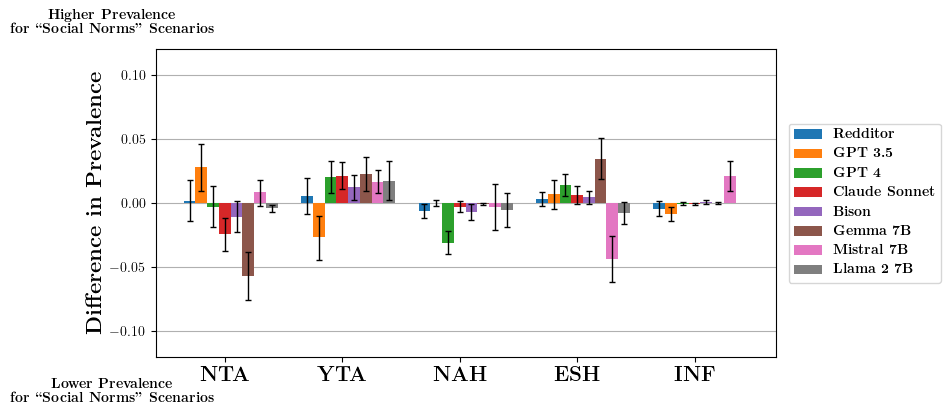

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

width = 0.1

for idx, verdict in enumerate(verdict_cols):
    proportions1 = df[df[scenario]][verdict].value_counts(normalize=True)
    proportions2 = df[~df[scenario]][verdict].value_counts(normalize=True)
    
    for label in labels:
        if label not in proportions1:
            proportions1[label] = 0
        if label not in proportions2:
            proportions2[label] = 0

    diff = proportions1 - proportions2
    diffs = [diff[label] for label in labels]

    ax.bar(
        x=np.arange(n_labels) + idx * width,
        height=[diff[label] for label in labels],
        width=width,
        color=f'C{idx}',
        yerr=[[diffs[jj] - bound.confidence_interval.low for jj, bound in enumerate(bounds[idx])],
              [bound.confidence_interval.high - diffs[jj] for jj, bound in enumerate(bounds[idx])]],
        capsize=2,
        error_kw={'linewidth': 1})   

ax.set_xticks(np.arange(5) + 3 * width)
ax.set_xticklabels(bold_text(labels), fontsize=15)

for idx, label in enumerate(plot_labels):
    ax.bar(x=0.5, height=0, color=f'C{idx}', label=bold_text(label))

ax.legend(loc='center left', bbox_to_anchor=(1.01, 0.5))
    
ax.set_ylim([-0.12, 0.12])
ax.grid(axis='y')
ax.set_axisbelow(True)

ax.set_ylabel(bold_text('Difference in Prevalence'), fontsize=16)

ax.text(x=-0.07, y=1.05, s=bold_text("Higher Prevalence\nfor ``Social Norms'' Scenarios"), transform=ax.transAxes, ha='center')
ax.text(x=-0.07, y=-0.15, s=bold_text("Lower Prevalence\nfor ``Social Norms'' Scenarios"), transform=ax.transAxes, ha='center')